In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from matplotlib import pyplot
from pandas import to_datetime
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, median_absolute_error
from sklearn.metrics import  mean_squared_error, mean_squared_log_error,mean_absolute_percentage_error

In [ ]:
pip install prophet

In [ ]:
import prophet
# print version number
print('Prophet %s' %prophet.__version__)

Prophet 1.1.1


# Loading dataset

In [ ]:
path = 'F:/Study Material/Project_Data/fremont-bridge.csv'

In [ ]:
df =pd.read_csv(path, header=0)
df

,Date,West,East
0,10-03-2012 00:00,4.0,9.0
1,10-03-2012 01:00,4.0,6.0
2,10-03-2012 02:00,1.0,1.0
3,10-03-2012 03:00,2.0,3.0
4,10-03-2012 04:00,6.0,1.0
...,...,...,...
45979,12-31-2017 19:00,9.0,12.0
45980,12-31-2017 20:00,6.0,8.0
45981,12-31-2017 21:00,3.0,10.0
45982,12-31-2017 22:00,7.0,6.0


# Data Preprocessing

In [ ]:
df.isnull().sum()

Date    0
West    8
East    8
dtype: int64

In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df['Total']=df['East']+df['West']

In [ ]:
df['Total']

0        13.0
1        10.0
2         2.0
3         5.0
4         7.0
         ... 
45979    21.0
45980    14.0
45981    13.0
45982    13.0
45983    16.0
Name: Total, Length: 45984, dtype: float64

In [ ]:
df.head()

,Date,West,East,Total
0,10-03-2012 00:00,4.0,9.0,13.0
1,10-03-2012 01:00,4.0,6.0,10.0
2,10-03-2012 02:00,1.0,1.0,2.0
3,10-03-2012 03:00,2.0,3.0,5.0
4,10-03-2012 04:00,6.0,1.0,7.0


In [ ]:
df.drop(["West","East"],axis=1,inplace=True)

# Plot the time series

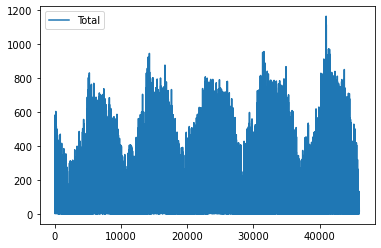

In [ ]:
df.plot()
pyplot.show()

# Prepare expected column names

In [ ]:
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [ ]:
from prophet import Prophet

In [ ]:
# define the model
model = Prophet()


In [ ]:
# fit the model
model.fit(df)

00:53:42 - cmdstanpy - INFO - Chain [1] start processing
00:53:53 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# create test dataset, remove last 12 months
test = df[-8760:]
test.tail()

,ds,y
45979,2017-12-31 19:00:00,21.0
45980,2017-12-31 20:00:00,14.0
45981,2017-12-31 21:00:00,13.0
45982,2017-12-31 22:00:00,13.0
45983,2017-12-31 23:00:00,16.0


In [ ]:
future = test

In [ ]:
future = pd.DataFrame(future)
future.columns = ['ds','y']
future['ds']= to_datetime(future['ds'])

In [ ]:
future['ds']

37224   2017-01-01 00:00:00
37225   2017-01-01 01:00:00
37226   2017-01-01 02:00:00
37227   2017-01-01 03:00:00
37228   2017-01-01 04:00:00
                ...        
45979   2017-12-31 19:00:00
45980   2017-12-31 20:00:00
45981   2017-12-31 21:00:00
45982   2017-12-31 22:00:00
45983   2017-12-31 23:00:00
Name: ds, Length: 8760, dtype: datetime64[ns]

In [ ]:
forecast = model.predict(future)

In [ ]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
forecast.info()

                      ds        yhat  yhat_lower  yhat_upper
0    2017-01-01 00:00:00  -95.883631 -204.514466   18.999784
1    2017-01-01 01:00:00 -102.953813 -220.227419   10.614349
2    2017-01-01 02:00:00 -133.042535 -244.606117   -8.941779
3    2017-01-01 03:00:00 -157.329980 -274.418506  -44.655121
4    2017-01-01 04:00:00 -142.655914 -259.949370  -31.097912
...                  ...         ...         ...         ...
8755 2017-12-31 19:00:00  100.215170   -4.498338  215.464015
8756 2017-12-31 20:00:00   12.435235  -99.073466  127.697802
8757 2017-12-31 21:00:00  -52.169135 -168.089021   74.577401
8758 2017-12-31 22:00:00  -71.033718 -195.991971   48.790210
8759 2017-12-31 23:00:00  -54.102552 -169.666988   56.503741

[8760 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds 

In [ ]:
print(test['y'],forecast['yhat'])

37224     5.0
37225    19.0
37226     1.0
37227     2.0
37228     1.0
         ... 
45979    21.0
45980    14.0
45981    13.0
45982    13.0
45983    16.0
Name: y, Length: 8760, dtype: float64 0       -95.883631
1      -102.953813
2      -133.042535
3      -157.329980
4      -142.655914
           ...    
8755    100.215170
8756     12.435235
8757    -52.169135
8758    -71.033718
8759    -54.102552
Name: yhat, Length: 8760, dtype: float64


In [ ]:
test.set_index('y',inplace = True)
test=test.reset_index()['y']
test

0        5.0
1       19.0
2        1.0
3        2.0
4        1.0
        ... 
8755    21.0
8756    14.0
8757    13.0
8758    13.0
8759    16.0
Name: y, Length: 8760, dtype: float64

In [ ]:
forecast['test']=test

In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          8760 non-null   datetime64[ns]
 1   trend                       8760 non-null   float64       
 2   yhat_lower                  8760 non-null   float64       
 3   yhat_upper                  8760 non-null   float64       
 4   trend_lower                 8760 non-null   float64       
 5   trend_upper                 8760 non-null   float64       
 6   additive_terms              8760 non-null   float64       
 7   additive_terms_lower        8760 non-null   float64       
 8   additive_terms_upper        8760 non-null   float64       
 9   daily                       8760 non-null   float64       
 10  daily_lower                 8760 non-null   float64       
 11  daily_upper                 8760 non-null   float64     

<AxesSubplot:>

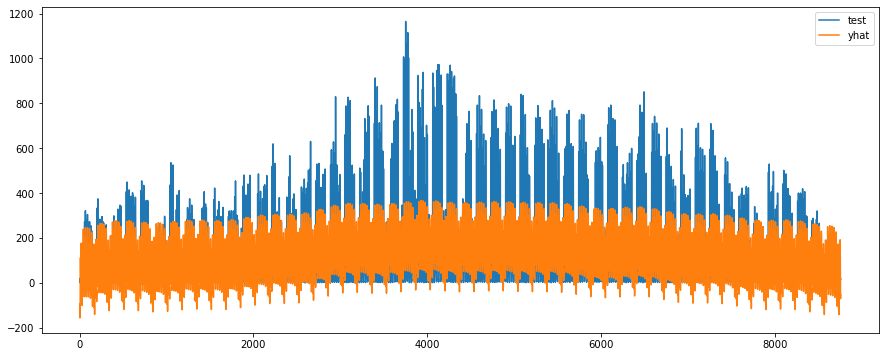

In [ ]:
forecast[['test','yhat']].plot(figsize=(15,6))

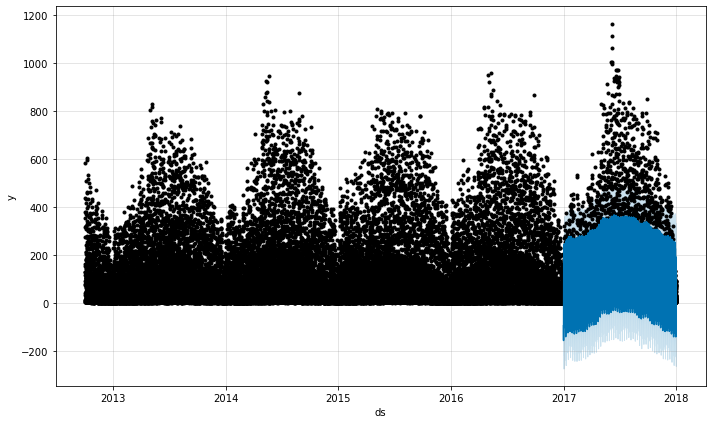

In [ ]:
# plot forecast
model.plot(forecast)
pyplot.show()

In [ ]:
# calculate MAE between expected and predicted values for december
y_true = forecast['test'].values
y_pred = forecast['yhat'].values

In [ ]:
def eval(y_true,y_predicted):
    mae = mean_absolute_error(y_true, y_predicted)
    mse = mean_squared_error(y_true, y_predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_predicted)
    return mae,rmse,mape

In [ ]:
mae,rmse,mape=eval(y_true,y_pred)
print("MAE = {} ; RMSE = {} ; MAPE = {}".format(mae,rmse,mape))

MAE = 68.35753476573893 ; RMSE = 101.01109937760327 ; MAPE = 3412563365301562.0
